# Chapter 02 2차원 벡터로 그림 그리기

## 2.1 2차원 벡터 그리기

In [1]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *

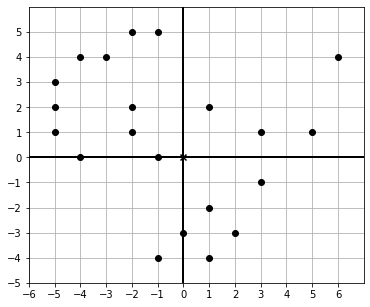

In [2]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4), (-5,3), (-5,2),(-2,2), (-5,1),
                    (-4,0), (-2,1), (-1,0), (0,-3), (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)]
draw(Points(*dino_vectors))

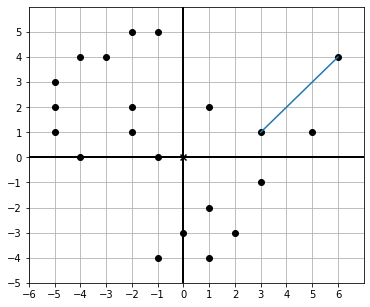

In [3]:
draw(Points(*dino_vectors),Segment((6,4),(3,1)))

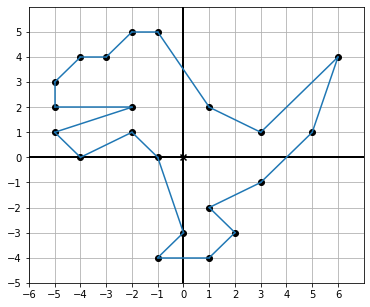

In [4]:
draw(Points(*dino_vectors),Polygon(*dino_vectors))

## 2.1.3 연습문제

### 연습문제 2.1
#### 공룡의 발끝에 해당하는 점의 x좌표와 y좌표를 구하라.

In [5]:
(-1,-4)

(-1, -4)

### 연습문제 2.2
#### 평면에 점 (2,-2)와 해당 점에 대응하는 화살표를 그려라.

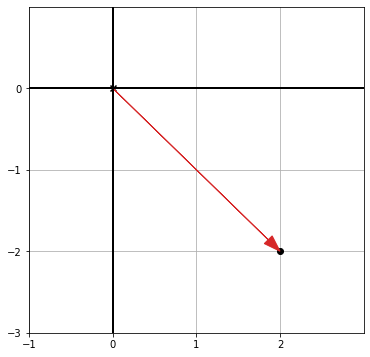

In [6]:
draw(Points((2,-2)),Arrow((2,-2)))

### 연습문제 2.3
#### 공룡의 외양을 나타내는 벡터를 나타내라

In [7]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4), (-5,3), (-5,2),(-2,2), (-5,1),
                    (-4,0), (-2,1), (-1,0), (0,-3), (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)]

### 연습문제 2.4
#### dino_vectors를 꼭짓점으로 해서 Polygon 객체를 생성하고 점들을 연결해서 공룡을 그려라.

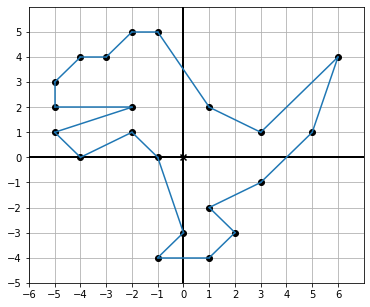

In [8]:
draw(Points(*dino_vectors),Polygon(*dino_vectors))

### 연습문제 2.5
#### draw 함수를 사용해 x=-10 이상 x=11 미만의 범위의 정수 x에 대해 벡터 (x,x**2)가 나타내는 점을 그려라.

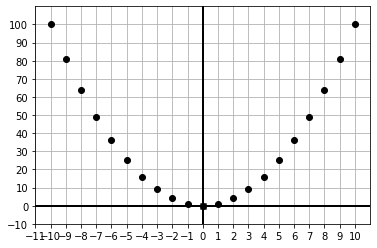

In [9]:
draw(
    Points(*[(x,x**2) for x in range (-10,11)]),
    grid = (1,10),
    nice_aspect_ratio = False)

## 2.2 평면벡터 산술

In [10]:
def add(v1,v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

In [11]:
dino_vectors2 = [add((-1.5,-2.5),v) for v in dino_vectors]

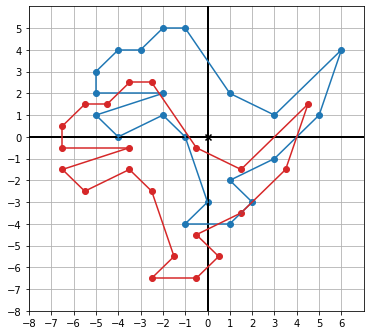

In [12]:
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
)

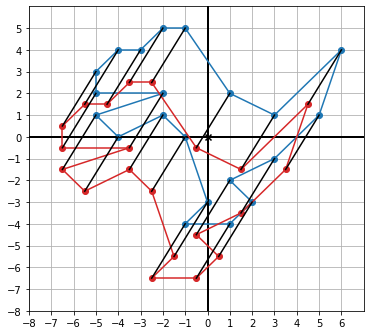

In [13]:
arrows = [Segment(tip,tail,color=black) for (tip,tail) in
         zip(dino_vectors2, dino_vectors)]
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red),
    *arrows
)

### 2.2.1 벡터의 성분과 길이

In [14]:
from math import sqrt
def length(v):
    return sqrt(v[0]^2 + v[1]^2)

###  2.2.3 뺄셈, 변위, 거리

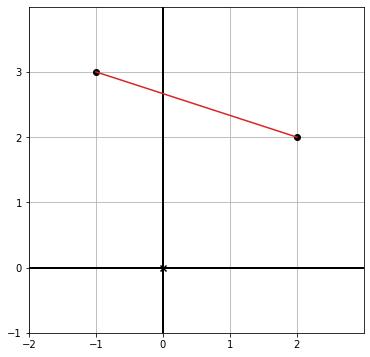

In [15]:
draw(
    Points((2,2), (-1,3)),
    Segment((2,2), (-1,3), color=red)
)

### 연습문제 2.6
#### 세 벡터가 u = (-2,0), v = (1.5,1.5), w = (4,1)일 때, u+v, v+w, u+w, u+v+w의 결과를 구하라.

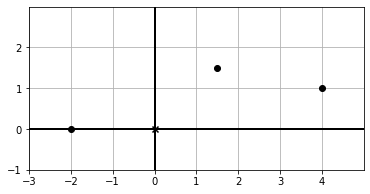

In [22]:
draw(
    Points((-2,0), (1.5,1.5), (4,1))
)

#### u+v = (-0.5,1.5)
#### v+w = (5.5,2.5)
#### u+w = (2,1)
#### u+v+w = (3.5,2.5)

### 연습문제 2.7 (MINI-PROJECT)
#### 여러 개의 벡터를 모두 더할 때, 각 벡터의 모든 x좌표와 각 벡터의 모든 y좌표를 더하면 된다. 예를 들어 4개의 벡터에 대한 벡터함 (1,2) + (2,4) + (3,6) + (4,8)의 x성분은 1 + 2 + 3 + 4 = 10이고, y성분은 2 + 4 + 6 + 9 = 20이므로 결과는 (10,20)이다. 임의 개수의 벡터가 인자로 주어질 수 있는 개선된 add 함수를 구현하라.

In [23]:
def add(*vectors):
    return (sum([v[0] for v in vectors]),sum([v[1] for v in vectors]))

### 연습문제 2.8
#### 평행이동을 나타내는 벡터 translation과 입력 벡터 리스트 vector를 입력으로 받고, translation에 의해 평행이동된 입력 벡터 리스트를 리런하는 함수 translate(translation, vectors)를 작성하라. 예를 들어 translate((1,1), [(0,0), (0,1), (-3,-3)])은 [(1,1), (1,2), (-2,-2)]를 리턴한다.

In [24]:
def translate(translation, vectors):
    return [add(translation, v) for v in vectors]

translate((1,1), [(0,0), (0,1), (-3,-3)])

[(1, 1), (1, 2), (-2, -2)]

### 연습문제 2.9 (MINI-PROJECT)
#### 임의의 두 벡터 u, v에 대한 벡터합 u + v는 v + u와 같은 결과가 나온다. 좌표에 대한 벡터 합의 정의를 이용해 이 문장이 참인 이유를 설명하라. 또한, 기하학적으로 이 문장이 참인 이유를 설명하는 그림을 그려라.

#### 임의의 두 벡터 u와 v를 실수 a,b,c,d에 대하여 u = (a,b), v = (c,d)라고 표기할 수 있다. 이 때 벡터합은 u + v = (a+c, b+d)이다. 한편, v + u = (c+a, d+b)이다. 실수의 덧셈에서는 더하는 순서가 중요하지 않기 때문에 두 순서쌍은 같다고 할 수 있다. 시각적으로 두 벡터를 임의로 선택해 삼각형벅을 적용해보자. 순서대로 벡터를 더하면 동일한 합벡터가 된다는 것을 다시 한 번 확인할 수 있다.